In [8]:
import json_helper

In [11]:
# use json_helper to load all json objects into a dataframe called df_daily_summaries
df_daily_summaries = json_helper.read_all_json_files("data/daily_summaries")

In [12]:
# display a summary of df_daily_summaries
df_daily_summaries.head()

,date,datatype,station,attributes,value,source
0,2018-01-01T00:00:00,PRCP,GHCND:US1DENC0001,",,N,0700",0,daily_summaries_FIPS10003_jan_2018_0.json
1,2018-01-01T00:00:00,SNWD,GHCND:US1DENC0001,"T,,N,0700",0,daily_summaries_FIPS10003_jan_2018_0.json
2,2018-01-01T00:00:00,PRCP,GHCND:US1DENC0002,",,N,0700",0,daily_summaries_FIPS10003_jan_2018_0.json
3,2018-01-01T00:00:00,SNOW,GHCND:US1DENC0002,",,N,0700",0,daily_summaries_FIPS10003_jan_2018_0.json
4,2018-01-01T00:00:00,SNWD,GHCND:US1DENC0002,"T,,N,0700",0,daily_summaries_FIPS10003_jan_2018_0.json


How many stations are there in total for FIPS10003

In [15]:
unique_stations = df_daily_summaries['station'].nunique()
print("Number of unique stations:", unique_stations)

Number of unique stations: 17


Create a DataFrame called temps_max that only contains the entries from df_daily_summaries where the datatype column is equal to TMAX. This DataFrame should only retain the date column and the value column.

In [16]:
temps_max = df_daily_summaries[df_daily_summaries['datatype'] == 'TMAX'][['date', 'value']].copy()

In [17]:
temps_max

,date,value
42,2018-01-01T00:00:00,-60
89,2018-01-02T00:00:00,-38
33,2018-01-23T00:00:00,172
76,2018-01-24T00:00:00,72


How many entries are there in the temps_max DataFrame? What are the mean, min, and max values?

In [18]:
num_entries = len(temps_max)
mean = temps_max['value'].mean()
min = temps_max['value'].min()
max = temps_max['value'].max()

print("Number of entries in temps_max DataFrame:", num_entries)
print("Mean value:", mean)
print("Minimum value:", min)
print("Maximum value:", max)

Number of entries in temps_max DataFrame: 4
Mean value: 36.5
Minimum value: -60
Maximum value: 172


Let's graph this DataFrame so we can get a visual representation for this information.

In [19]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [20]:
%matplotlib inline

In [21]:
x = temps_max['date'].str[8:10]
y = temps_max['value'] / 10

[Text(0.5, 0, 'day of month'),
 Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 1.0, 'Max Temperatues Jan 2018')]

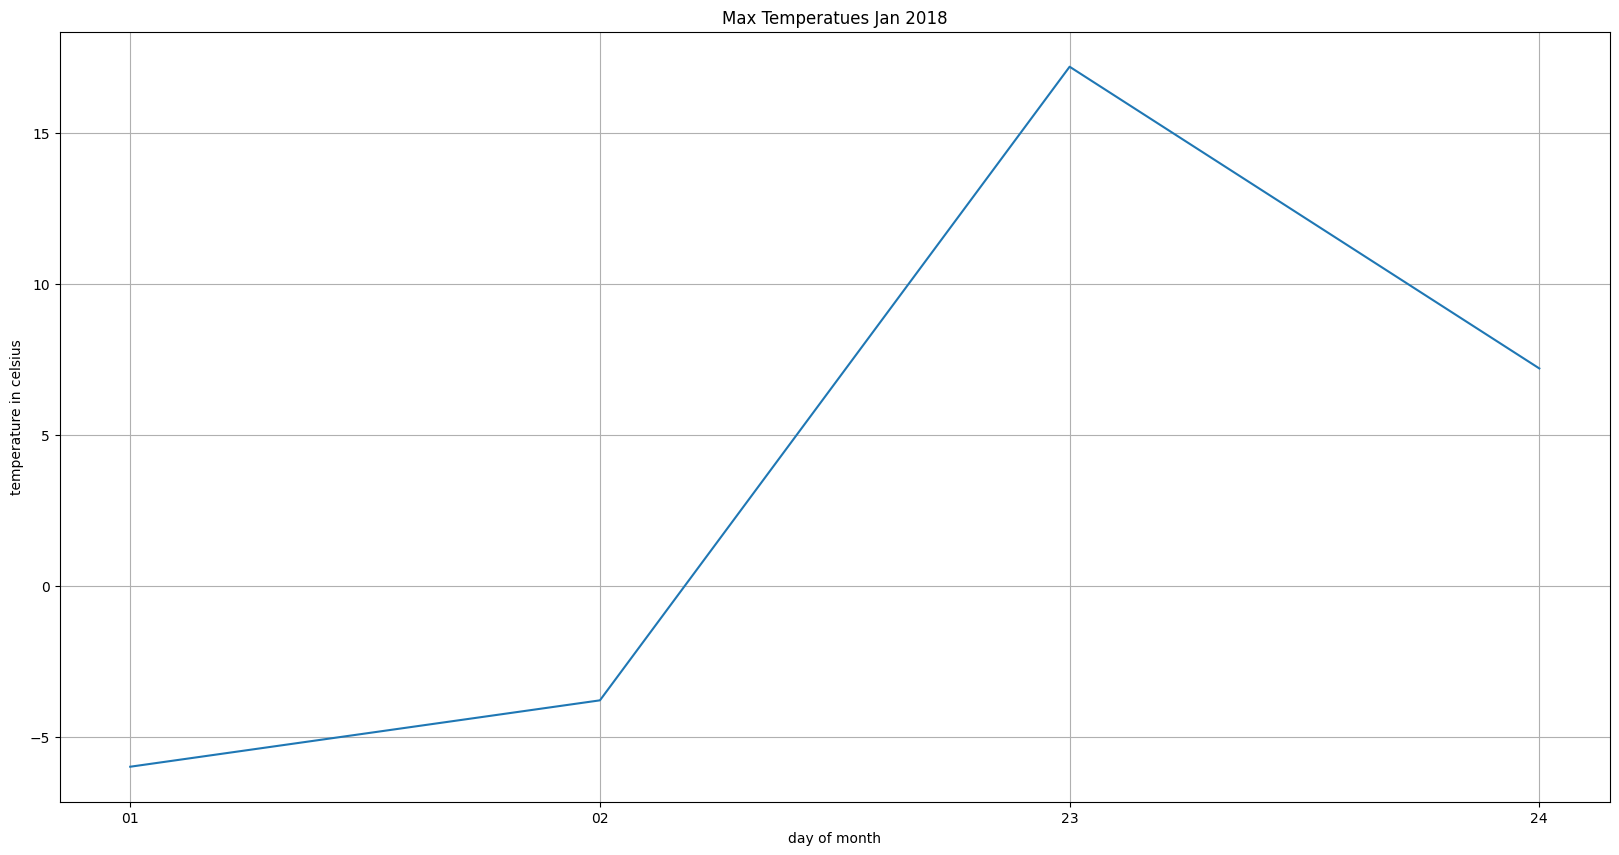

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, y)
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Max Temperatues Jan 2018')

Create a DataFrame called temps_min that only contains the entries from df_daily_summaries where the datatype column is equal to TMIN. This DataFrame should only retain the date column and the value column.

In [23]:
temps_min = df_daily_summaries[df_daily_summaries['datatype'] == 'TMIN'][['date', 'value']].copy()

In [24]:
temps_min

,date,value
43,2018-01-01T00:00:00,-149
90,2018-01-02T00:00:00,-116
34,2018-01-23T00:00:00,44
77,2018-01-24T00:00:00,6


How many entries are there in the temps_min DataFrame? What are the mean, min, and max values?

In [25]:
num_entries = len(temps_min)
mean = temps_min['value'].mean()
min = temps_min['value'].min()
max = temps_min['value'].max()

print("Number of entries in temps_min DataFrame:", num_entries)
print("Mean value:", mean)
print("Minimum value:", min)
print("Maximum value:", max)

Number of entries in temps_min DataFrame: 4
Mean value: -53.75
Minimum value: -149
Maximum value: 44


Graph the temps_min DataFrame

[Text(0.5, 0, 'day of month'),
 Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 1.0, 'Min Temperatues Jan 2018')]

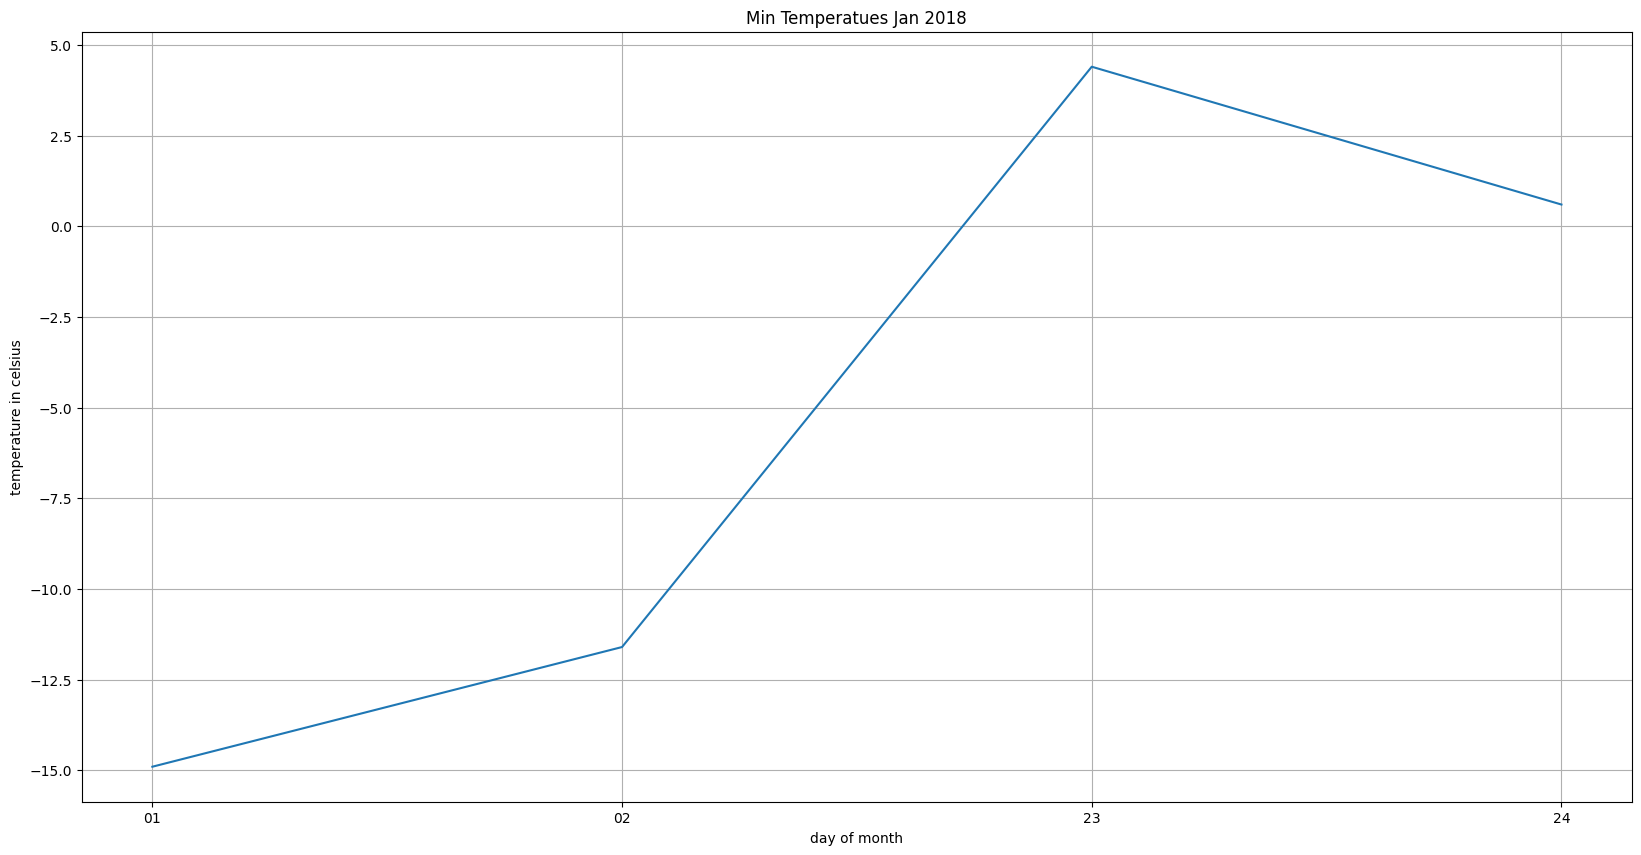

In [26]:
x = temps_min['date'].str[8:10]
y = temps_min['value'] / 10

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, y)
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Min Temperatues Jan 2018')

We can also plot both of these lines in the same graph.

[Text(0.5, 0, 'day of month'),
 Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 1.0, 'Min & Max Temperatues Jan 2018')]

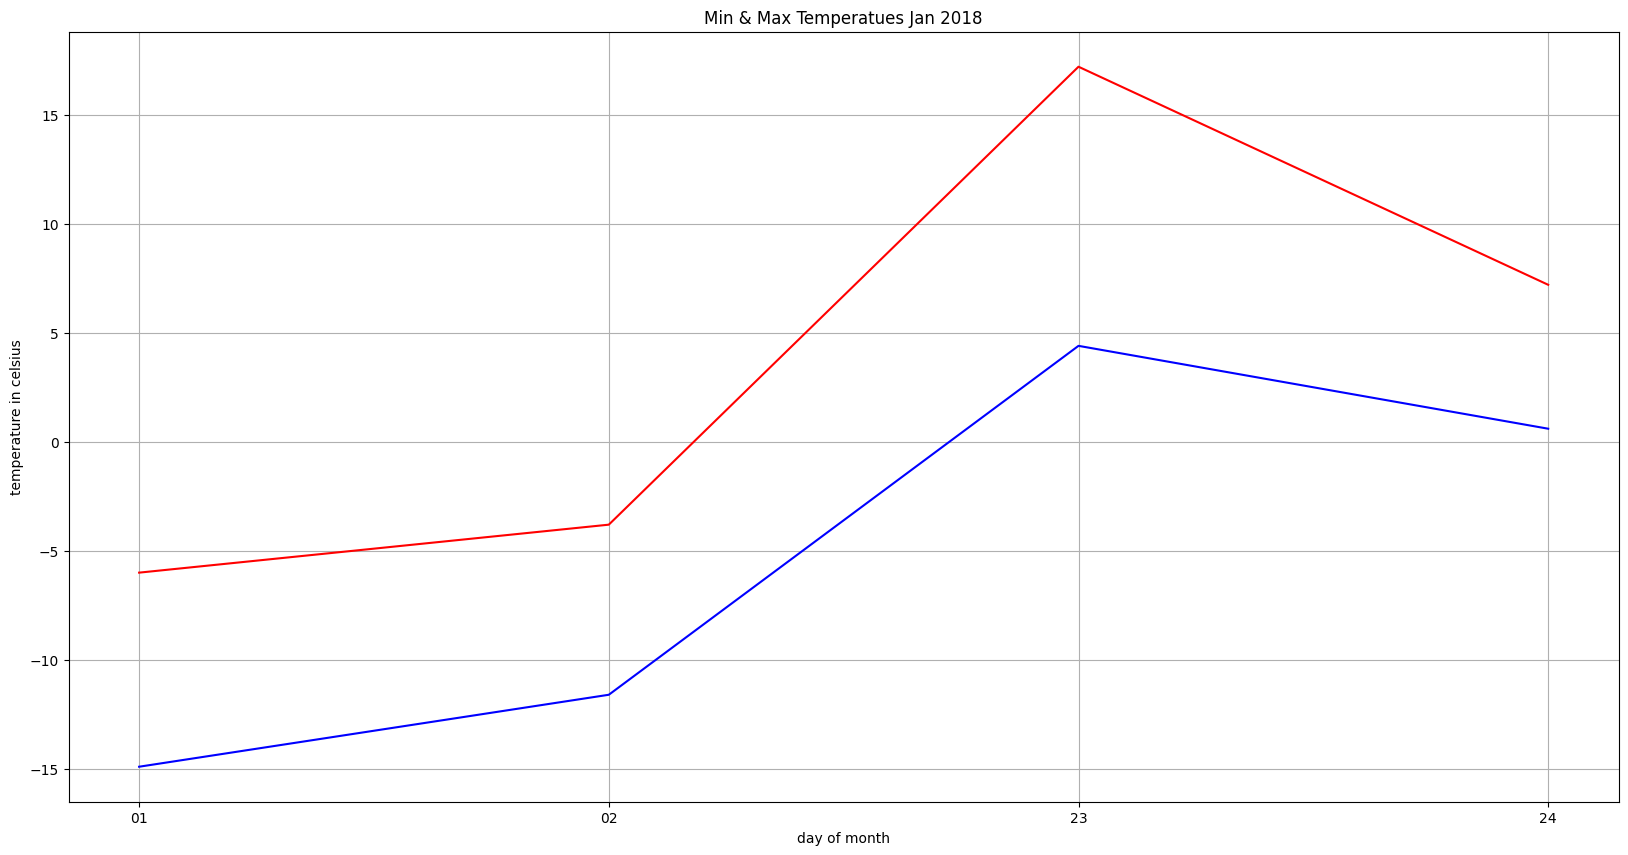

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, temps_max['value'] / 10, color='red')
ax.plot(x, temps_min['value'] / 10, color='blue')
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Min & Max Temperatues Jan 2018')